In [1]:
%cd drive/MyDrive/PyTorch-Pyramid-Feature-Attention-Network-for-Saliency-Detection/

/content/drive/MyDrive/PyTorch-Pyramid-Feature-Attention-Network-for-Saliency-Detection


In [55]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

import argparse
import cv2
import numpy as np
import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from src.model import SODModel
from src.dataloader import InfDataloader, SODLoader
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [13]:
device = torch.device(device='cuda')
imgs_folder='./data/DUTS/DUTS-TE/DUTS-TE-Image'
model_path='best-model.pth'
img_size = 256
bs = 24

In [14]:
# Load model
model = SODModel()
chkpt = torch.load(model_path, map_location=device)
model.load_state_dict(chkpt['model'])
model.to(device)
model.eval()

SODModel(
  (vgg16): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [16]:
inf_data = InfDataloader(img_folder=imgs_folder, target_size=img_size)
# Since the images would be displayed to the user, the batch_size is set to 1
# Code at later point is also written assuming batch_size = 1, so do not change
inf_dataloader = DataLoader(inf_data, batch_size=1, shuffle=True, num_workers=2)

Press 'q' to quit.
Image : 1


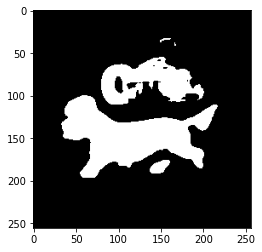

Image : 2


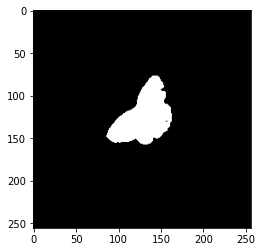

Image : 3


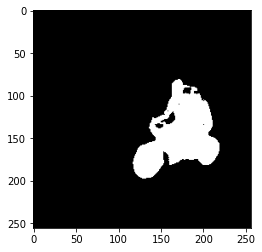

In [57]:
print("Press 'q' to quit.")
with torch.no_grad():
  for batch_idx, (img_np, img_tor) in enumerate(inf_dataloader, start=1):
    img_tor = img_tor.to(device)
    pred_masks, _ = model(img_tor)

    # Assuming batch_size = 1
    img_np = np.squeeze(img_np.numpy(), axis=0)
    img_np = img_np.astype(np.uint8)
    img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)
    pred_masks_raw = np.squeeze(pred_masks.cpu().numpy(), axis=(0, 1))
    pred_masks_round = np.squeeze(pred_masks.round().cpu().numpy(), axis=(0, 1))

    print('Image :', batch_idx)
    plt.imshow(img_np)
    plt.imshow(pred_masks_raw)
    plt.imshow(pred_masks_round, cmap='gray')
    plt.show()
    key = cv2.waitKey(0)
    if key == ord('q'):
      break
